In [1]:
import os
import time
import uuid
import cv2

C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [9]:
cap = cv2.VideoCapture(0)

for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(2)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [10]:
!labelme

C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [11]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [12]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)

In [13]:
images.as_numpy_iterator().next()

b'data\\images\\003d7c0e-e375-11ed-a775-e00af66051f7.jpg'

In [14]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [15]:
images = images.map(load_image)

In [16]:
images.as_numpy_iterator().next()

array([[[166, 159, 153],
        [166, 159, 153],
        [165, 157, 154],
        ...,
        [200, 220, 245],
        [206, 223, 251],
        [209, 226, 254]],

       [[166, 158, 155],
        [167, 159, 156],
        [167, 159, 156],
        ...,
        [201, 221, 246],
        [206, 223, 251],
        [208, 225, 253]],

       [[164, 159, 156],
        [166, 161, 158],
        [167, 162, 159],
        ...,
        [201, 223, 246],
        [204, 224, 249],
        [205, 225, 250]],

       ...,

       [[ 55,  65,  74],
        [ 63,  73,  82],
        [ 71,  80,  89],
        ...,
        [232, 247, 254],
        [241, 255, 255],
        [242, 255, 255]],

       [[ 57,  65,  76],
        [ 70,  78,  89],
        [ 75,  81,  93],
        ...,
        [229, 244, 251],
        [240, 255, 255],
        [243, 255, 255]],

       [[ 49,  57,  68],
        [ 66,  74,  85],
        [ 72,  78,  90],
        ...,
        [228, 241, 249],
        [240, 255, 255],
        [242, 255, 255]]

In [17]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [18]:
image_generator = images.batch(4).as_numpy_iterator()

In [19]:
plot_images = image_generator.next()

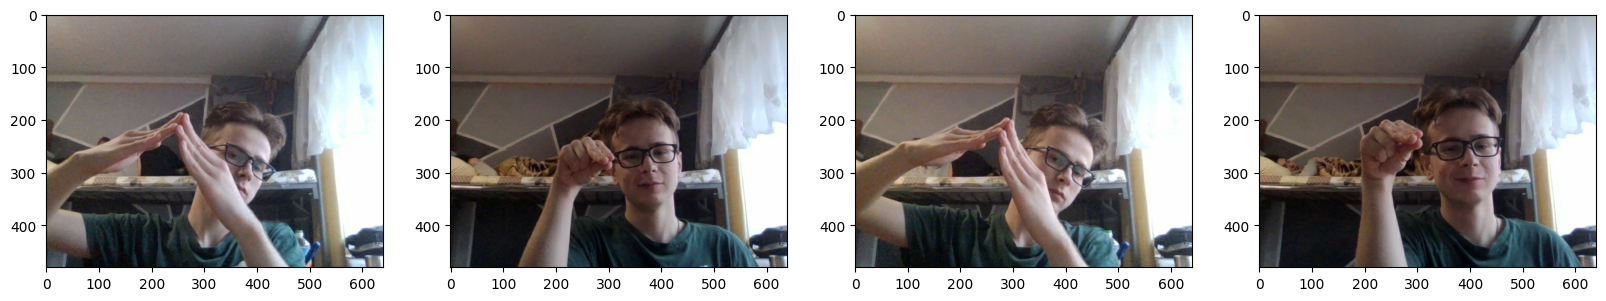

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [21]:
210*.7

147.0

In [22]:
210*.15

31.5

In [23]:
210*.3

63.0

In [25]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)    

In [26]:
import albumentations as alb

In [27]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [135]:
img = cv2.imread(os.path.join('data','train', 'images','03dae698-e375-11ed-a5fb-e00af66051f7.jpg'))

In [136]:
with open(os.path.join('data', 'train', 'labels', '03dae698-e375-11ed-a5fb-e00af66051f7.json'), 'r') as f:
    label = json.load(f)

In [137]:
label['shapes'][0]['points']

[[93.5897435897436, 254.35897435897436],
 [379.2307692307692, 478.4615384615385]]

In [138]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [139]:
coords

[93.5897435897436, 254.35897435897436, 379.2307692307692, 478.4615384615385]

In [140]:
coords = list(np.divide(coords, [640,480,640,480]))
coords

[0.1462339743589744,
 0.5299145299145299,
 0.5925480769230769,
 0.9967948717948719]

In [141]:
class_label = label['shapes'][0]['label']
class_label

'home'

In [142]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=[class_label])

In [143]:
augmented['bboxes']

[(0.5350427350427351, 0.0, 1.0, 0.4525356125356125)]

In [144]:
augmented['image']

array([[[ 72,  65,  55],
        [ 74,  66,  56],
        [ 75,  69,  59],
        ...,
        [ 11,   4,   2],
        [ 11,   6,   0],
        [ 11,   6,   0]],

       [[ 48,  37,  23],
        [ 57,  46,  34],
        [ 63,  52,  42],
        ...,
        [ 11,   4,   2],
        [ 11,   6,   0],
        [ 11,   6,   0]],

       [[ 46,  38,  26],
        [ 49,  40,  29],
        [ 49,  40,  29],
        ...,
        [ 13,   6,   4],
        [ 15,  10,   2],
        [ 13,   8,   0]],

       ...,

       [[191, 187, 183],
        [191, 187, 183],
        [190, 186, 182],
        ...,
        [106, 113, 129],
        [105, 113, 129],
        [105, 113, 129]],

       [[191, 187, 183],
        [191, 187, 183],
        [190, 186, 182],
        ...,
        [105, 113, 129],
        [103, 113, 129],
        [103, 113, 129]],

       [[191, 188, 184],
        [191, 187, 183],
        [189, 185, 181],
        ...,
        [105, 113, 129],
        [103, 113, 129],
        [103, 113, 129]]

In [145]:
augmented['class_labels']

['home']

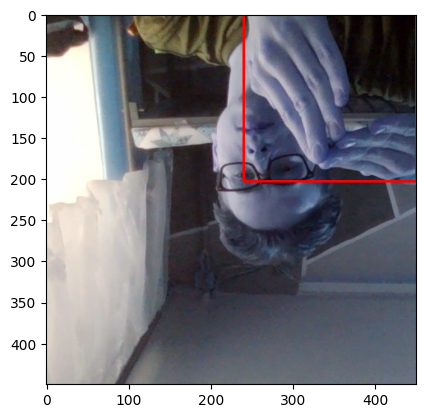

In [146]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [182]:
gesture_list = ['hello', 'yes', 'no', 'home', 'love', 'loveyou', 'family']

In [420]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
                class_label = label['shapes'][0]['label']

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        # try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=[class_label])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = [0,0,0,0,0,0,0]
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = [0,0,0,0,0,0,0]
                        annotation['class'][gesture_list.index(class_label)] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = [0,0,0,0,0,0,0]


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        # except Exception as e:
        #     print(f"{e}\nsomething is wrong!")
            

In [421]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [422]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [423]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [424]:
train_images.as_numpy_iterator().next()

array([[[0.6887255 , 0.55539215, 0.6509804 ],
        [0.6764706 , 0.5441176 , 0.6392157 ],
        [0.6713848 , 0.54295343, 0.6360907 ],
        ...,
        [0.5219363 , 0.40821078, 0.52977943],
        [0.51501226, 0.39479166, 0.5362745 ],
        [0.52009803, 0.39460784, 0.5397059 ]],

       [[0.678125  , 0.5478554 , 0.6392157 ],
        [0.67015934, 0.53682595, 0.63529414],
        [0.6720588 , 0.53817403, 0.63284314],
        ...,
        [0.5132353 , 0.39558825, 0.52892154],
        [0.51715684, 0.39558825, 0.52892154],
        [0.5251838 , 0.39497548, 0.53952205]],

       [[0.67107844, 0.5416667 , 0.6093137 ],
        [0.67107844, 0.5416667 , 0.61115193],
        [0.67156863, 0.5373162 , 0.6068627 ],
        ...,
        [0.51231617, 0.39466912, 0.52800244],
        [0.5137255 , 0.39264706, 0.5259804 ],
        [0.50324756, 0.3816789 , 0.51501226]],

       ...,

       [[0.33547795, 0.128125  , 0.20802696],
        [0.30919117, 0.10269608, 0.1817402 ],
        [0.26678923, 0

In [443]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return label['class'], label['bbox']

In [444]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [445]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [446]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [448]:
train_labels.as_numpy_iterator().next()

(array([0, 0, 0, 1, 0, 0, 0], dtype=uint8),
 array([0.1527, 0.408 , 0.8276, 0.9175], dtype=float16))

In [449]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(8460, 8460, 1800, 1800, 1860, 1860)

In [450]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [451]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [452]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [453]:
train.as_numpy_iterator().next()[1]

(array([[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0]], dtype=uint8),
 array([[0.4636 , 0.3513 , 0.812  , 0.592  ],
        [0.6416 , 0.0845 , 1.     , 0.5186 ],
        [0.4705 , 0.2563 , 0.7837 , 0.5254 ],
        [0.268  , 0.223  , 0.596  , 0.606  ],
        [0.1974 , 0.3413 , 0.456  , 0.5693 ],
        [0.3132 , 0.0971 , 0.8647 , 0.4958 ],
        [0.5894 , 0.4548 , 0.946  , 0.856  ],
        [0.2617 , 0.12024, 0.617  , 0.5737 ]], dtype=float16))

In [454]:
data_samples = train.as_numpy_iterator()
data_samples

In [455]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


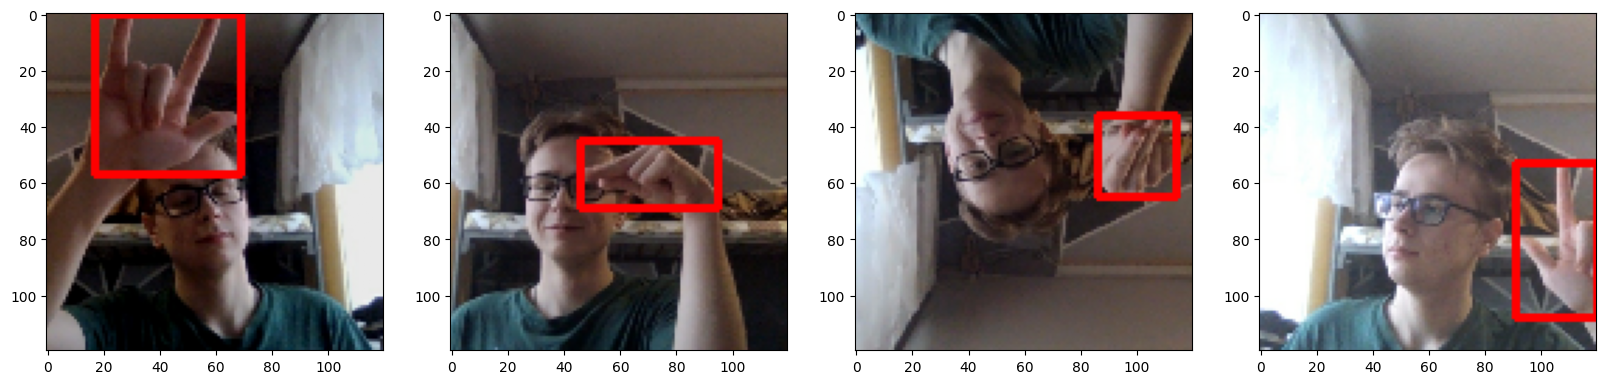

In [456]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [457]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, Flatten
from tensorflow.keras.applications import VGG16

In [458]:
vgg = VGG16(include_top=False)

In [459]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [460]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(7, activation='softmax')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [461]:
facetracker = build_model()

In [462]:
facetracker.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_17[0][0]']               
                                512)                                                              
                                                                                                  
 global_max_pooling2d_12 (Globa  (None, 512)         0           ['vgg16[0][0]']                  
 lMaxPooling2D)                                                                             

In [463]:
X, y = train.as_numpy_iterator().next()

In [464]:
X.shape

(8, 120, 120, 3)

In [465]:
y

(array([[0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0]], dtype=uint8),
 array([[0.4368 , 0.1111 , 0.866  , 0.4656 ],
        [0.     , 0.1456 , 0.2484 , 0.681  ],
        [0.05225, 0.3525 , 0.4111 , 0.578  ],
        [0.0493 , 0.3455 , 0.3535 , 0.5835 ],
        [0.744  , 0.405  , 1.     , 0.633  ],
        [0.1373 , 0.4604 , 0.778  , 0.8867 ],
        [0.1337 , 0.3076 , 0.619  , 0.6826 ],
        [0.732  , 0.3154 , 0.968  , 0.794  ]], dtype=float16))

In [466]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 2s 2s/step


In [467]:
classes, coords

(array([[0.19731116, 0.16472676, 0.24419844, 0.11305507, 0.07645994,
         0.09458786, 0.10966079],
        [0.16255546, 0.1778618 , 0.22782451, 0.12726474, 0.07261261,
         0.10750508, 0.12437581],
        [0.16737111, 0.1512796 , 0.2473074 , 0.16960873, 0.06373822,
         0.07470459, 0.12599038],
        [0.1953634 , 0.16289236, 0.2904871 , 0.10023604, 0.04054386,
         0.10505214, 0.10542504],
        [0.17939685, 0.14168625, 0.20351166, 0.18342389, 0.06182817,
         0.08481205, 0.14534114],
        [0.21604964, 0.1228542 , 0.20404464, 0.15925515, 0.09333684,
         0.07541803, 0.12904145],
        [0.15345348, 0.14673582, 0.23856306, 0.15493932, 0.09860665,
         0.08861775, 0.11908393],
        [0.2081983 , 0.1414093 , 0.19448964, 0.19931409, 0.05144848,
         0.08568498, 0.11945524]], dtype=float32),
 array([[0.7283422 , 0.28288683, 0.4880227 , 0.3045035 ],
        [0.7291344 , 0.3173015 , 0.5771469 , 0.29642528],
        [0.6847689 , 0.3797828 , 0.4925878 

In [468]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [469]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [470]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [479]:
classloss = tf.keras.losses.CategoricalCrossentropy()
regressloss = localization_loss

In [480]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.5407634>

In [481]:
classes

array([[0.19731116, 0.16472676, 0.24419844, 0.11305507, 0.07645994,
        0.09458786, 0.10966079],
       [0.16255546, 0.1778618 , 0.22782451, 0.12726474, 0.07261261,
        0.10750508, 0.12437581],
       [0.16737111, 0.1512796 , 0.2473074 , 0.16960873, 0.06373822,
        0.07470459, 0.12599038],
       [0.1953634 , 0.16289236, 0.2904871 , 0.10023604, 0.04054386,
        0.10505214, 0.10542504],
       [0.17939685, 0.14168625, 0.20351166, 0.18342389, 0.06182817,
        0.08481205, 0.14534114],
       [0.21604964, 0.1228542 , 0.20404464, 0.15925515, 0.09333684,
        0.07541803, 0.12904145],
       [0.15345348, 0.14673582, 0.23856306, 0.15493932, 0.09860665,
        0.08861775, 0.11908393],
       [0.2081983 , 0.1414093 , 0.19448964, 0.19931409, 0.05144848,
        0.08568498, 0.11945524]], dtype=float32)

In [482]:
y[0]

array([[0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [483]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=1.8322169>

In [484]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=6.5407634>

In [485]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [486]:
model = FaceTracker(facetracker)

In [487]:
model.compile(opt, classloss, regressloss)

In [488]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [491]:
hist = model.fit(train, epochs=10, batch_size=32, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
1058/1058 [==============================] - 4498s 4s/step - total_loss: 0.2737 - class_loss: 0.1802 - regress_loss: 0.1836 - val_total_loss: 0.3096 - val_class_loss: 0.3054 - val_regress_loss: 0.1569
Epoch 2/10
1058/1058 [==============================] - 4636s 4s/step - total_loss: 0.0707 - class_loss: 0.0133 - regress_loss: 0.0641 - val_total_loss: 0.0365 - val_class_loss: 0.0297 - val_regress_loss: 0.0217
Epoch 3/10
1058/1058 [==============================] - 4468s 4s/step - total_loss: 0.0429 - class_loss: 0.0059 - regress_loss: 0.0400 - val_total_loss: 0.0233 - val_class_loss: 4.8810e-04 - val_regress_loss: 0.0231
Epoch 4/10
1058/1058 [==============================] - 6017s 6s/step - total_loss: 0.0446 - class_loss: 0.0105 - regress_loss: 0.0394 - val_total_loss: 0.0709 - val_class_loss: 0.0089 - val_regress_loss: 0.0664
Epoch 5/10
1058/1058 [==============================] - 6913s 7s/step - total_loss: 0.0210 - class_loss: 0.0027 - regress_loss: 0.0197 - val_total_l

In [492]:
hist.history

{'total_loss': [0.16113819181919098,
  0.015974069014191628,
  0.005010777618736029,
  0.0044960323721170425,
  0.03526153415441513,
  0.007511294912546873,
  0.006627201568335295,
  0.003988792188465595,
  0.0032771951518952847,
  0.0018049797508865595],
 'class_loss': [0.001099484390579164,
  0.0003489554801490158,
  6.380926060955971e-05,
  0.0003347269375808537,
  0.022096024826169014,
  3.311131877126172e-05,
  0.00023656635312363505,
  7.512210868299007e-05,
  0.00011377385817468166,
  3.6479075788520277e-05],
 'regress_loss': [0.16058844327926636,
  0.015799591317772865,
  0.004978872835636139,
  0.004328669048845768,
  0.02421352081000805,
  0.007494739256799221,
  0.006508918479084969,
  0.003951231017708778,
  0.0032203083392232656,
  0.0017867402639240026],
 'val_total_loss': [0.3095752000808716,
  0.03653369098901749,
  0.02329632081091404,
  0.0708652138710022,
  0.007819409482181072,
  0.03938283771276474,
  0.11816808581352234,
  0.03111342340707779,
  0.0336932465434074

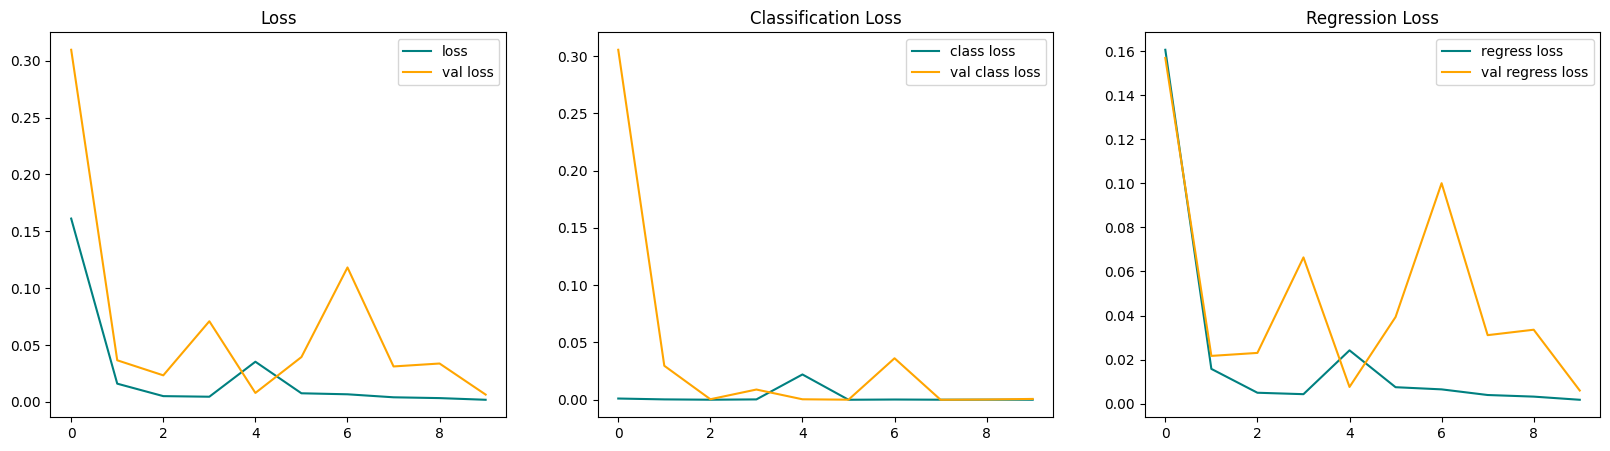

In [493]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [494]:
test_data = test.as_numpy_iterator()

In [535]:
test_sample = test_data.next()

In [536]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


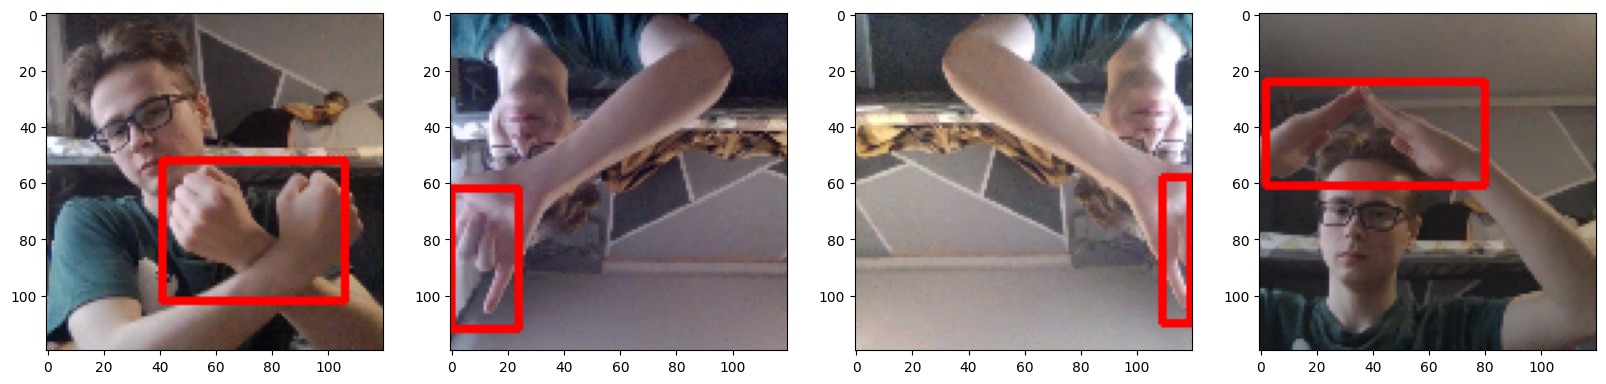

In [537]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx].max() > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [505]:
from tensorflow.keras.models import load_model

In [506]:
facetracker.save('gesturetracker.h5')

In [507]:
facetracker = load_model('gesturetracker.h5')

In [534]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    if yhat[0].max() > 0.95: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, f"{gesture_list[yhat[0][0].argmax()]} {round(yhat[0][0].max(), 3) * 100}%", tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),            
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 286ms/step
